In [57]:
import csv
import pandas
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from math import *

In [23]:
data_path = "/Users/user/stroopdata.csv"
with open (data_path,'r') as f:
    data=csv.DictReader(f)
    for value in data:
        print(value)

OrderedDict([('Congruent', '12.079'), ('Incongruent', '19.278')])
OrderedDict([('Congruent', '16.791'), ('Incongruent', '18.741')])
OrderedDict([('Congruent', '9.564'), ('Incongruent', '21.214')])
OrderedDict([('Congruent', '8.630'), ('Incongruent', '15.687')])
OrderedDict([('Congruent', '14.669'), ('Incongruent', '22.803')])
OrderedDict([('Congruent', '12.238'), ('Incongruent', '20.878')])
OrderedDict([('Congruent', '14.692'), ('Incongruent', '24.572')])
OrderedDict([('Congruent', '8.987'), ('Incongruent', '17.394')])
OrderedDict([('Congruent', '9.401'), ('Incongruent', '20.762')])
OrderedDict([('Congruent', '14.480'), ('Incongruent', '26.282')])
OrderedDict([('Congruent', '22.328'), ('Incongruent', '24.524')])
OrderedDict([('Congruent', '15.298'), ('Incongruent', '18.644')])
OrderedDict([('Congruent', '15.073'), ('Incongruent', '17.510')])
OrderedDict([('Congruent', '16.929'), ('Incongruent', '20.330')])
OrderedDict([('Congruent', '18.200'), ('Incongruent', '35.255')])
OrderedDict([(

# 1. What is our independent variable? What is our dependent variable?

Independent Variable - words (Congruent or Incongruent).

Dependent Variable - Amount of Time someone takes to recognize the color.

# 2.What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Null Hypothesis**: (  μi - μc = 0 ) There is **no** significant difference in the population average response time in viewing the congruent words vs viewing the incongruent words.

**Alternative Hypothesis**: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

For this sample t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. We are measuring the same variable after some intervention in old data. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here).

# 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [25]:
df = pandas.read_csv("/Users/user/stroopdata.csv")
c = df['Congruent']
i = df['Incongruent']

In [33]:
c_mean = c.mean()
print("Mean of Congruent")
round(c_mean,4)
#print(c_mean)

Mean of Congruent


14.0511

In [34]:
i_mean=i.mean()
print("Mean of Incongruent")
round(i_mean,4)

Mean of Incongruent


22.0159

In [36]:
c_sd=c.std()
print("Standard Deviation of Congruent")
round(c_sd,4)

Standard Deviation of Congruent


3.5594

In [37]:
i_sd=i.std()
print("Standard Deviation of Incongruent")
round(i_sd,4)

Standard Deviation of Incongruent


4.7971

Mean of congruent and incongruent is Central tendency and Standard Deviation of congruent and incongruent is Variability

# 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

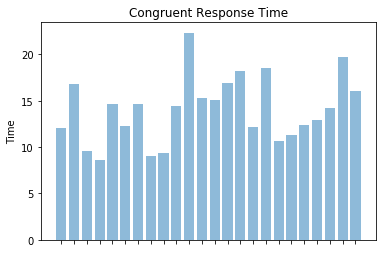

In [55]:
def createbars(data):
    sub=[]
    i=1
    with open(data,'r') as f_in:
        reader=csv.DictReader(f_in)
        df = pandas.read_csv(f_in)
        for row in reader:
            sub.append(i)
            i=i+1
        y_pos = np.arange(len(df['Congruent']))
        plt.bar(y_pos,df['Congruent'],align='center',alpha=0.5)
        plt.xticks(y_pos,sub)
        plt.ylabel('Time')
        plt.title('Congruent Response Time')
        plt.show()
datapath="/Users/user/stroopdata.csv"
createbars(datapath)

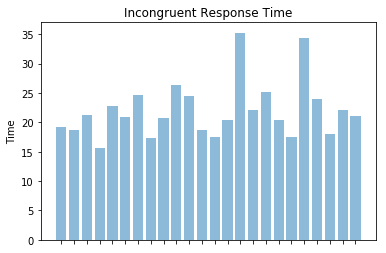

In [56]:
def createbars(data):
    sub=[]
    i=1
    with open(data,'r') as f_in:
        reader=csv.DictReader(f_in)
        df = pandas.read_csv(f_in)
        for row in reader:
            sub.append(i)
            i=i+1
        y_pos = np.arange(len(df['Incongruent']))
        plt.bar(y_pos,df['Incongruent'],align='center',alpha=0.5)
        plt.xticks(y_pos,sub)
        plt.ylabel('Time')
        plt.title('Incongruent Response Time')
        plt.show()
datapath="/Users/user/stroopdata.csv"
createbars(datapath)

There are 24 response time in each experiment but by looking at the table we can see that response time of Incongruent experiment is more as compared to Congruent Experiment

# 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Confidence Level = 95%  
t-critical value (2-sided test) -> from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)  
Degree of freedom = n - 1 = 23  
t critical value =  +- 2.069

In [67]:
n = len(df)
print(n)
PE = i_mean - c_mean
round(PE,4)

24


7.9648

In [68]:
df['D'] = df['Incongruent'] - df['Congruent']
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM
SSD = df['SQD'].sum()
v = SSD/(n-1)
s = sqrt(v)
round(s,4)

4.8648

In [69]:
#t value would be
t=PE*sqrt(n)/s
round(t,4)

8.0207

T-statistics is way bigger then T-critical value so we Reject the **Null Hypothesis**

# Conclusion

We reject the Null Hypothesis which states that there is no significant differences between the population average completion time for the two different conditions (Congruent & Incongruent). In theory, if we were able to calculate the average difference of every single person person who took this pair of tests (the population) we expect there would be a significantly slower or significantly faster time in either the the incongruent or congruent condition. These are the results I expected since my own anecdotal experience showed that the second condition took me longer to complete. 